# 1. Understand the problem


##### Prédire la note finale d'un élève en mathématiques en fonction de quelques conditions sociales et d'étude.

# 2. Choose an appropriate data

##### LA DESCRIPTION
Données sur la la note en mathématiques des élèves du secondaire avec des informations sociales, sur le sexe et sur les études.

##### SOMMAIRE
Les données ont été obtenues lors d'une enquête auprès des élèves des cours de mathématiques à l'école secondaire. Il contient beaucoup d'informations sociales, de genre et d'études intéressantes sur les étudiants. Vous pouvez l'utiliser pour certains EDA ou essayer de prédire la note finale des étudiants.

Attributs pour les ensembles de données student-mat.csv:

**school** - école de l'élève (binaire : 'GP' - Gabriel Pereira ou 'MS' - Mousinho da Silveira)

**sex** - sexe de l'élève (binaire : 'F' - féminin ou 'M' - masculin)

**age** - âge de l'élève (numérique : de 15 à 22)

**address** - type d'adresse du domicile de l'étudiant (binaire : 'U' - urbain ou 'R' - rural)

**famsize** - taille de la famille (binaire : 'LE3' - inférieur ou égal à 3 ou 'GT3' - supérieur à 3)

**Pstatus** - statut de cohabitation des parents (binaire : 'T' - vivant ensemble ou 'A' - séparé)

**Medu** - éducation de la mère (numérique : 0 - aucun, 1 - enseignement primaire (4e année), 2 - 5e à 9e année, 3 - enseignement secondaire ou 4 - enseignement supérieur)

**Fedu** - éducation du père (numérique : 0 - aucun, 1 - enseignement primaire (4e année), 2 - 5e à 9e année, 3 - enseignement secondaire ou 4 - enseignement supérieur)

**Mjob** - travail de la mère (nominal : « enseignant », « soins de santé », « services » civils (par exemple, administration ou police), « à domicile » ou « autre »)

**Fjob** - emploi du père (nominal : « enseignant », « soins de santé » liés aux soins, « services » civils (par exemple, administration ou police), « à domicile » ou « autre »)

**reason** - raison de choisir cette école (nominal : proche de la « maison », « réputation » de l'école, préférence de « cours » ou « autre »)

**guardian** - tuteur de l'élève (nominal : « mère », « père » ou « autre »)

**traveltime** - temps de trajet domicile-école (numérique : 1 - <15 min., 2 - 15 à 30 min., 3 - 30 min. à 1 heure, ou 4 - >1 heure)

**studytime** - temps d'étude hebdomadaire (numérique : 1 - <2 heures, 2 - 2 à 5 heures, 3 - 5 à 10 heures, ou 4 - >10 heures)

**failures** - nombre d'échecs de classe passés (numérique : n si 1<=n<3, sinon 4)

**schoolsup** - soutien pédagogique supplémentaire (binaire : oui ou non)

**famsup** - soutien éducatif familial (binaire : oui ou non)

**paid** - cours supplémentaires payés dans le cadre du cours (maths) (binaire : oui ou non)

**activities** - activités parascolaires (binaire : oui ou non)

**nursery** - a fréquenté l'école maternelle (binaire : oui ou non)

**higher** - veut faire des études supérieures (binaire : oui ou non)

**internet** - Accès internet à domicile (binaire : oui ou non)

**romantic** - avec une relation amoureuse (binaire : oui ou non)

**famrel** - qualité des relations familiales (numérique : de 1 - très mauvais à 5 - excellent)

**freetime** - temps libre après l'école (numérique : de 1 - très faible à 5 - très élevé)

**goout** - sortir avec des amis (numérique : de 1 - très faible à 5 - très élevé)

**Dalc** - consommation d'alcool au travail (numérique : de 1 - très faible à 5 - très élevée)

**Walc** - consommation d'alcool le week-end (numérique : de 1 - très faible à 5 - très élevée)

**health** - état de santé actuel (numérique : de 1 - très mauvais à 5 - très bon)

**absences** - nombre d'absences scolaires (numérique : de 0 à 93)

Ces notes sont liées à la matière du cours, Mathématiques:

**G1** - note de première période (numérique : de 0 à 20)

**G2** - note de deuxième période (numérique : de 0 à 20)

**G3** - note finale (numérique : de 0 à 20, objectif de sortie)

**Source** : Kaggle

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn import metrics


In [2]:
data = pd.read_csv('student-mat.csv')
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10





# 3. Prepare the data

**Affichons quelques informations de notre jeu de données**

In [3]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [5]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [6]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

# 

**Étant donné que la plupart des algorithmes d'apprentissage automatique et des métriques de corrélation sont basés sur des valeurs numériques , nous devons convertir toutes les données en valeurs numériques.**

In [7]:
#Preprocessing our data
def preprocess_data(new_data):
    new_data.replace({'school':{'MS': 1,'GP':0},
                      'sex':{'M': 1,'F':0},
                      'address':{'U': 1,'R':0},
                      'famsize':{'LE3': 2,'GT3':4},
                      'Pstatus':{'T': 1,'A':0},
                      'Mjob':{'at_home': 0,'teacher':1, 'health' :2, 'services':3, 'other':4},
                      'Fjob':{'at_home': 0,'teacher':1, 'health' :2, 'services':3, 'other':4},
                      'reason':{'home': 0,'course':1, 'reputation' :2, 'other':3},
                      'guardian':{'father': 1,'mother':0, 'other':2},
                      'schoolsup':{'yes': 1,'no':0},
                      'famsup':{'yes': 1,'no':0},
                      'paid':{'yes': 1,'no':0},
                      'activities':{'yes': 1,'no':0},
                      'nursery':{'yes': 1,'no':0},
                      'higher':{'yes': 1,'no':0},
                      'internet':{'yes': 1,'no':0},
                      'romantic':{'yes': 1,'no':0}},inplace=True)

    return new_data
data=preprocess_data(data)
data.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,4,0,4,4,0,1,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,4,1,1,1,0,4,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,2,1,1,1,0,4,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,4,1,4,2,2,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,4,1,3,3,4,4,...,4,3,2,1,2,5,4,6,10,10


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      395 non-null    int64
 1   sex         395 non-null    int64
 2   age         395 non-null    int64
 3   address     395 non-null    int64
 4   famsize     395 non-null    int64
 5   Pstatus     395 non-null    int64
 6   Medu        395 non-null    int64
 7   Fedu        395 non-null    int64
 8   Mjob        395 non-null    int64
 9   Fjob        395 non-null    int64
 10  reason      395 non-null    int64
 11  guardian    395 non-null    int64
 12  traveltime  395 non-null    int64
 13  studytime   395 non-null    int64
 14  failures    395 non-null    int64
 15  schoolsup   395 non-null    int64
 16  famsup      395 non-null    int64
 17  paid        395 non-null    int64
 18  activities  395 non-null    int64
 19  nursery     395 non-null    int64
 20  higher      395 non-null    int6

# 


# 4. Do some visualization


# 

**Visualisons la distribution de la varible target et de quelques variablent qui nous semblent très importants**

<AxesSubplot:xlabel='sex', ylabel='count'>

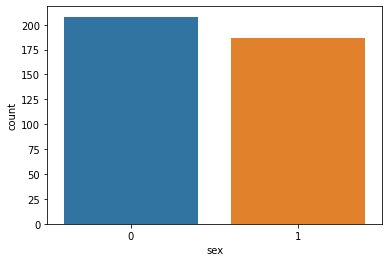

In [9]:
# le sexe de l'élève

sns.countplot(x="sex", data=data)

#### Nous voyons que le nombre de garçons concernés par cette étude représente plus de 52% des élèves.

#### La différence n'est pas très grande.

# 

<AxesSubplot:xlabel='Medu', ylabel='count'>

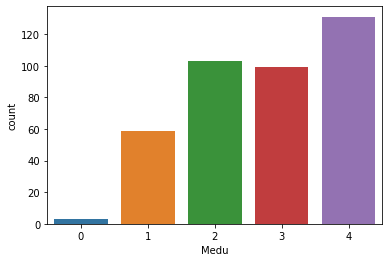

In [10]:
# le niveau d'éducation de la mère de l'élève

sns.countplot(x="Medu", data=data)

#### Nous pouvons en déduire que les mamans de ces élèves ont généralement fait des études assez poussées parce que 58% d'entre elles ont un niveau d'étude supérieur ou égal aux études secondaires.

#### Est-ce que le niveau d'étude de la mère va impacter sur les scolaires de l'élève?

# 

<AxesSubplot:xlabel='Fedu', ylabel='count'>

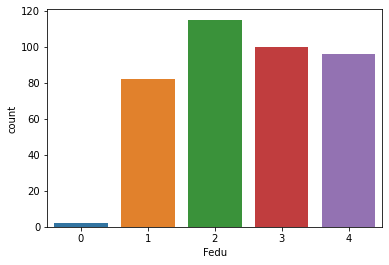

In [11]:
# le niveau d'éducation du père de l'élève

sns.countplot(x="Fedu", data=data)

#### Ici, nous pouvons souligner que le niveau d'étude des papas de ces élèves n'est pas généralement assez poussé car un peu plus de 50% d'entre eux n'ont pas atteind les études secondaires.

#### Cela aura-il un effet sur la performance des élèves?

# 

<AxesSubplot:xlabel='reason', ylabel='count'>

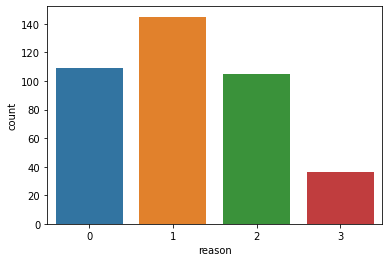

In [12]:
# la raison davoir choisi cette école

sns.countplot(x="reason", data=data)

#### L'analyse de ce graphique montre que:
#### - 36% des élèves interviewés ont choisi leur école par préférence des cours qui y sont donnés,
#### - 27% parce que l'école est proche de leurs maisons
#### - 26% pour la réputation de l'école


# 

<AxesSubplot:xlabel='studytime', ylabel='count'>

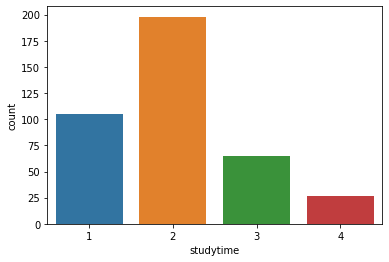

In [13]:
# le temps hebdomadaire consacré aux études par l'élève

sns.countplot(x="studytime", data=data)

#### Le temps d'étude n'est pas très important puisque 76% de ces élèves n'étudient que 2 à 5 heures de temps par semaine.

#### Cela est dû à la souplesse du programme ou au niveau des élèves?

# 

<AxesSubplot:xlabel='schoolsup', ylabel='count'>

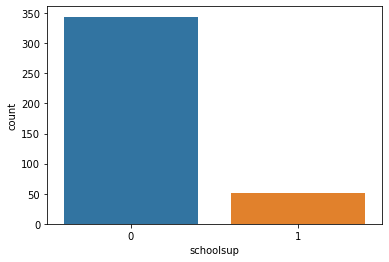

In [14]:
# soutien pédagogique supplémentaire de l'élève

sns.countplot(x="schoolsup", data=data)

#### Il n'y a que très peu d'élèves qui bénéficient d'un soutien pédagogique supplémentaire: soit 12%.

#### Est-ce par manque de temps, de moyen ou de volonté?

# 

<AxesSubplot:xlabel='higher', ylabel='count'>

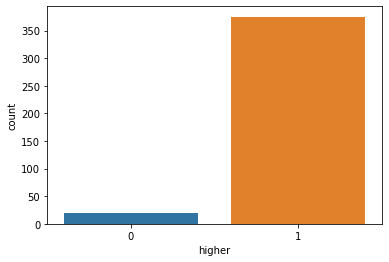

In [15]:
# désir de l'élève à continuer ses études à l'université

sns.countplot(x="higher", data=data)

#### Près de 94% des élèves envisagent de poursuivre leurs études après le bac.

#### Ce choix est-il influencé par les parents?

# 

<AxesSubplot:xlabel='internet', ylabel='count'>

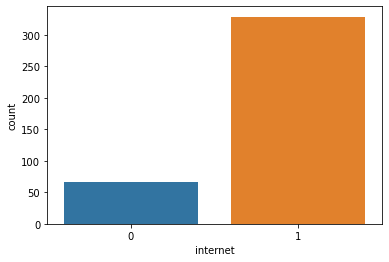

In [16]:
# accès de l'élève à l'internet à la maison

sns.countplot(x="internet", data=data)

#### Les élèves qui ont accès à l'internet chez eux représentent près de 83% du nombre total des élèves.

#### Cela est peut-être dû au fait que beaucoup d'entre eux habitent en ville.

# 

<AxesSubplot:xlabel='Walc', ylabel='count'>

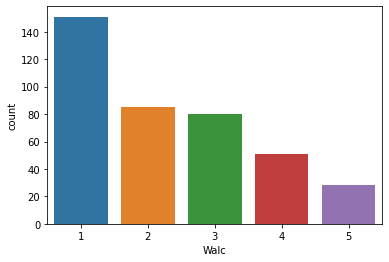

In [17]:
# la consommation d'alcool de l'élève le week-end

sns.countplot(x="Walc", data=data)

#### De manière générale, la consommation d'alcool pendant le week-end est assez faible.

#### C'est peut-être parce que 71% de ces élèves ont moins de 18 ans. Ce qui limite un peu leur liberté de sortie.

# 

<AxesSubplot:xlabel='absences', ylabel='count'>

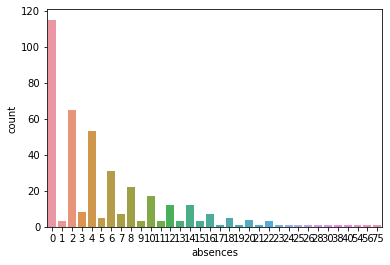

In [18]:
# le nombre d'absences scolaires de l'élève

sns.countplot(x="absences", data=data)

#### Le taux d'absences est assez faible de manière générale parce que 58% de ces élèves ont un nombre d'absences qui varie de 0 à 4.
#### Mais il y a quand-même quelques uns qui ont un nombre très élevé d'absences comme celui qui 75 absences.

#### Ce dernier était peut-être malade ou a abandonné en plein milieu de l'année scolaire.

# 

<AxesSubplot:xlabel='G1', ylabel='count'>

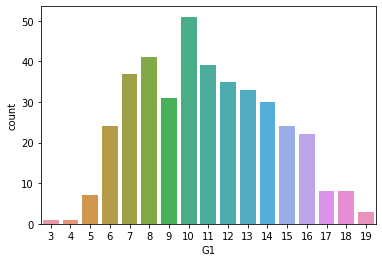

In [19]:
# la première note de l'élève en mathématiques

sns.countplot(x="G1", data=data)

#### Les notes du premier trimestre varient de 3/20 à 19/20 avec un taux de 65% d'élèves qui ont eu la moyenne.

#### Ces bons résultats ne seraient-ils pas le fruit d'un soutien des parents?

# 

<AxesSubplot:xlabel='G2', ylabel='count'>

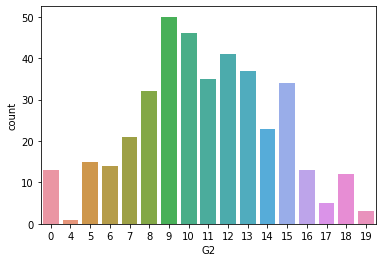

In [20]:
# la deuxième note de l'élève en mathématiques

sns.countplot(x="G2", data=data)

#### Les notes du deuxième trimestre sont de 0 à 19. Ceux qui ont eu la moyenne représentent, cette fois-ci, 63%.
#### Ce qui est une légère baisse par rapport aux notes du premier trimestre.

#### Ce relachement est au niveau des élèves ou des parents?

# 

<AxesSubplot:xlabel='G3', ylabel='count'>

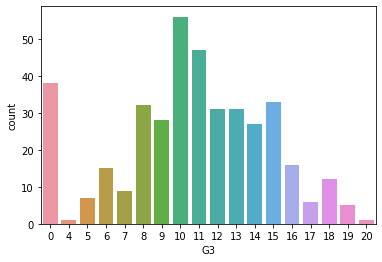

In [21]:
# la note finale de l'élève en mathématiques. Variable "target".

sns.countplot(x="G3", data=data)

#### Les notes finales des élèves varient entre 0 et 20. On remarque une nette augmentation du pourcentage de réussite qui est cette fois ci de 67%.

#### Cette note représente la note de sortie. Est-ce pour cela que les élèves se sont donnés à fond ou y a t-il un autre facteur?

# 

# 


**Visualisons les corrélations qui nous semblent les plus pertinentes entre les variables**

<AxesSubplot:xlabel='G3', ylabel='count'>

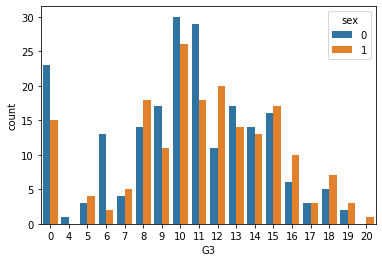

In [22]:
# Entre le sexe de l'élève et la note de sortie.

sns.countplot(x='G3', hue='sex', data=data)

##### Nous voyons que la différence n'est pas très grande entre les notes finales des garçons et celles des filles.

# 

<AxesSubplot:xlabel='G3', ylabel='count'>

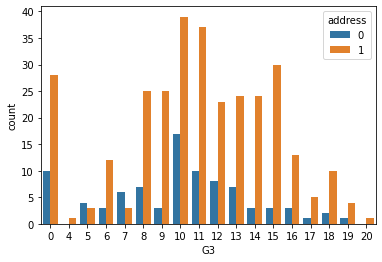

In [23]:
# Entre l'adresse de l'élève et sa note de sortie.

sns.countplot(x='G3', hue='address', data=data)

#### Les élèves issus du mileu urbain ont les meilleurs résultats. 
#### Cela est dû au fait que:
#### - soit,les conditions de vie et de d'étude à la maison sont plus favorables dans les villes que dans la campagne
#### - soit, le nombre d'élèves venus du milieu urbain dépasse largement celui de ceux issus du milieu rural. Cela influence les résultats.

# 

<AxesSubplot:xlabel='G3', ylabel='count'>

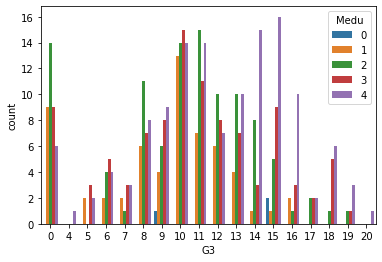

In [24]:
sns.countplot(x='G3', hue='Medu', data=data)

#### On voit clairement que le niveau d'étude de la maman a une forte influence sur la note d l'élève
#### parce que le graphique montre que ceux qui ont eu plus de grandes notes des mamans qui ont un niveau d'étude allant du secondaire à l'université.
#### Donc, plus la maman est instruite, plus elle apporte un soutien à son enfant.

# 

<AxesSubplot:xlabel='Medu', ylabel='count'>

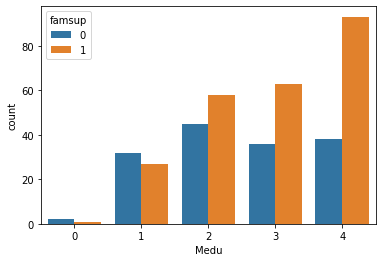

In [25]:
sns.countplot(x='Medu', hue='famsup', data=data)

#### Ce graphique confirme notre hypothèse selon laquelle les femmes qui ont un niveau élevé d'étude sont celles qui apportent plus de soutien à leurs enfants.

# 

<AxesSubplot:xlabel='G3', ylabel='count'>

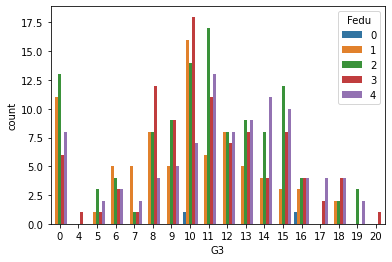

In [26]:
sns.countplot(x='G3', hue='Fedu', data=data)

#### Le niveau d'étude du père n'a pas un très fort effet sur la scolarisation de l'enfant.
#### Peut-être parce les papas n'ont pas beaucoup de temps à leur consacrer du fait des exigences du boulot.

# 

<AxesSubplot:xlabel='G3', ylabel='count'>

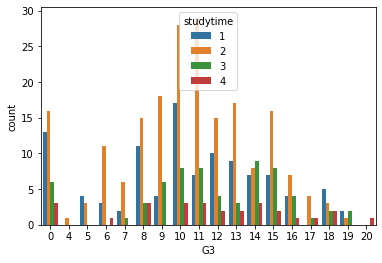

In [27]:
sns.countplot(x='G3', hue='studytime', data=data)

#### Le temps d'étude joue sur la note finale de l'élève. Ce graphique nous montre que ce sont les élèves qui observent un temps d'étude
#### de 2 à 5 heures par semaine qui ont tendance à décrocher les meilleures notes.

#### Ce sont peut-être des élèves avec un fort niveau de compréhension ou un bon soutien à la maison.

# 

<AxesSubplot:xlabel='G3', ylabel='count'>

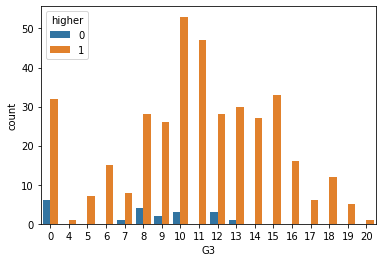

In [28]:
sns.countplot(x='G3', hue='higher', data=data)

#### Ce graphique nous montre que le fait de désirer continuer ces études ou non joue fortement sur les notes de l'élève.
#### En effet, un élève qui compte aller à l'université donnera plus de lui-même pour réussir que quelqu'un qui pense à arrêter ses études.

# 

<AxesSubplot:xlabel='Fedu', ylabel='count'>

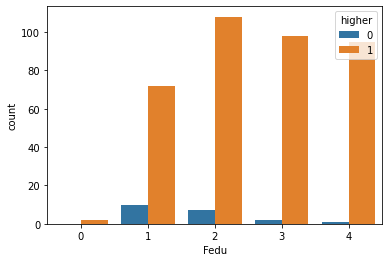

In [29]:
sns.countplot(x='Fedu', hue='higher', data=data)

#### Ici, nous voyons que plus le niveau d'étude du père est élevé, plus l'élève a de chance de souhaiter continuer ses études.
#### Cela peut s'expliquer par le fait que le papa a fortement influencé ce choix.

# 

<AxesSubplot:xlabel='G3', ylabel='count'>

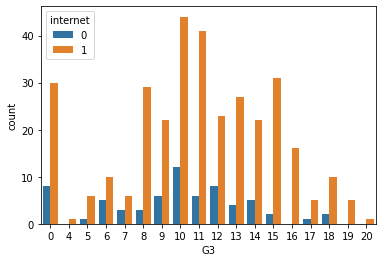

In [30]:
sns.countplot(x='G3', hue='internet', data=data)

#### Ce diagramme nous montre que l'accès à l'internet à la maison, s'il est bien encadré, participe fortement à l'amélioration de la note de l'éleve.

# 

# 

**La corrélation entre toutes les différentes variables**

In [31]:
cor = data.corr()
cor

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
school,1.000000,-0.012286,0.377610,-0.279797,-0.064866,0.045923,-0.133333,-0.079807,-0.017961,-0.030658,...,-0.047926,0.032988,-0.007152,0.114209,0.065087,-0.042651,-0.088480,-0.025731,-0.050086,-0.045017
sex,-0.012286,1.000000,-0.028606,-0.028504,-0.089862,0.023443,0.078228,0.034878,0.038205,0.051778,...,0.058971,0.238744,0.075897,0.268171,0.274194,0.143588,-0.066962,0.091839,0.091099,0.103456
age,0.377610,-0.028606,1.000000,-0.146722,-0.037847,0.029598,-0.163658,-0.163438,-0.010162,0.008021,...,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
address,-0.279797,-0.028504,-0.146722,1.000000,-0.072472,-0.042572,0.138804,0.072178,0.064527,-0.047740,...,0.014258,0.034878,0.068835,-0.093494,-0.101126,-0.040355,-0.027874,0.069704,0.126037,0.105756
famsize,-0.064866,-0.089862,-0.037847,-0.072472,1.000000,0.149612,0.043068,0.058879,0.031677,-0.003049,...,0.022776,-0.017695,-0.023064,-0.101521,-0.103425,0.028992,-0.035783,-0.071445,-0.081223,-0.081407
Pstatus,0.045923,0.023443,0.029598,-0.042572,0.149612,1.000000,-0.123565,-0.088730,-0.075274,0.053881,...,0.025179,0.038717,0.003459,-0.030590,0.006045,0.022307,-0.134937,-0.016868,-0.041382,-0.058009
Medu,-0.133333,0.078228,-0.163658,0.138804,0.043068,-0.123565,1.000000,0.623455,-0.054629,-0.139394,...,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.079807,0.034878,-0.163438,0.072178,0.058879,-0.088730,0.623455,1.000000,-0.115887,-0.278106,...,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
Mjob,-0.017961,0.038205,-0.010162,0.064527,0.031677,-0.075274,-0.054629,-0.115887,1.000000,0.169553,...,0.051328,0.022125,0.028317,0.031940,-0.026624,0.044887,0.060409,-0.072842,-0.003311,0.002725
Fjob,-0.030658,0.051778,0.008021,-0.047740,-0.003049,0.053881,-0.139394,-0.278106,0.169553,1.000000,...,0.070631,-0.013501,0.058227,-0.014868,0.149048,-0.014234,0.037076,-0.165043,-0.086116,-0.069639


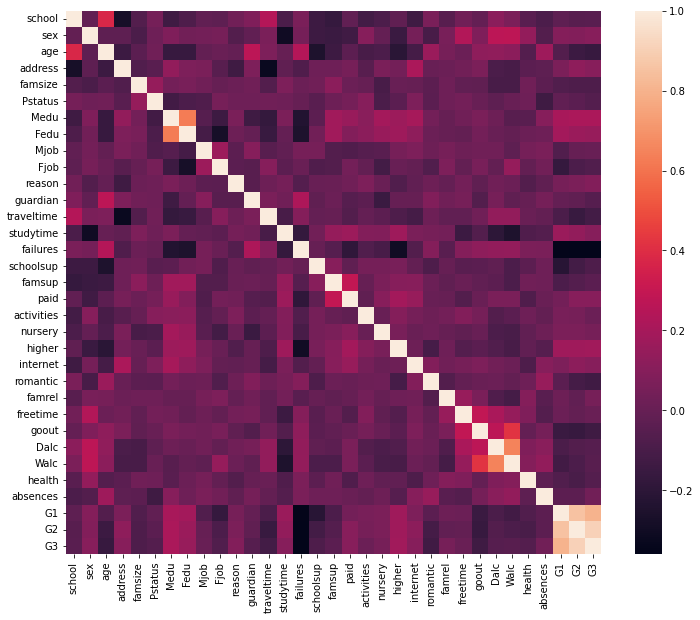

In [32]:
def plot_correlation_map(data):
    corr=data.corr()
    s, ax=plt.subplots(figsize=(12,10))
    s=sns.heatmap(corr,ax=ax,annot=False)
plot_correlation_map(data)

**Nous voyons que les variables comme 'G1', 'G2', 'sex', 'studytime', 'higher', 'Medu', 'Fedu', 'internet' ont une corrélation plus ou moins importante avec la variable de sortie 'G3'**


# 

# 


# 5. Choose the right algorithm

**Puisque notre problème consiste à prédire la note finale de l'élève qui est une valeur continue, nous pensons 
qu'un algorithme de regréssion serait plus adapté. Nous allons utiliser les différents algorithmes de régression que nous connaissons pour voir lequel est plus performant**

# 


# 6. Model


## Régression Linéaire Multiple

In [33]:
# Nous allons d'abord extraire x et y de notre jeu de données
x=data[['G2', 'higher', 'Medu', 'Fedu']]
y=data["G3"].values

# Divisons nos données en un ensemble d'entraînement et de test où l'ensemble de test représente 35%
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) 

# Construisons notre modèle de Régression Linéaire Multiple
model=LinearRegression() 

# Entraînement de notre modèle
model.fit(x_train,y_train) 

# Test de la performance de notre modèle
predicted=model.predict(x_test) 

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))


MSE 3.437185360633775
R squared 0.8246511806489976


In [34]:
# Répétons le même processus mais cette fois-ci avec 20% comme taille de test et 52 comme état aléatoir

x=data[['G2', 'higher', 'Medu', 'Fedu']]
y=data["G3"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=52) 

model=LinearRegression() 

model.fit(x_train,y_train) 

predicted=model.predict(x_test) 

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))


MSE 1.6202164174009108
R squared 0.9098242222608746


**Après avoir modifié les hyperparamètres 'test_size' et 'random_state', la performance du modèle de Régression Linéaire Multiple augmente.**

# 



## Régression Polynomiale

In [35]:
# Nous allons d'abord extraire x et y de notre jeu de données
x=data[['G2', 'higher', 'Medu', 'Fedu']]
y=data["G3"].values

# Divisons nos données en un ensemble d'entraînement et de test où l'ensemble de test représente 35%
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40)


# Construisons notre modèle de Régression Polynomiale
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

# Entraînement de notre modèle
x_train_fit = poly.fit_transform(x_train) 
lg.fit(x_train_fit, y_train)

# Test de la performance de notre modèle
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))


MSE 7.72267377600802
R squared 0.6060259815006708


In [36]:
# Répétons le même processus mais cette fois-ci avec 20% comme taille de test et 42 comme état aléatoir

x=data[['G2', 'higher', 'Medu', 'Fedu']]
y=data["G3"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

x_train_fit = poly.fit_transform(x_train) 
lg.fit(x_train_fit, y_train)

x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))


MSE 4.819614939984134
R squared 0.7649547022751776


**Nous voyons qu'après avoir modifié les paramètres 'test_size' et 'random_state', le modèle de régression polynomiale devient plus performant.**

## Régression Linéaire

In [37]:
# Nous allons d'abord extraire x et y de notre jeu de données
x=data["G2"].values[:,np.newaxis]
y=data["G3"].values

# Divisons nos données en un ensemble d'entraînement et de test où l'ensemble de test représente 35%
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) 

# Construisons notre modèle de Régression Linéaire
model=LinearRegression() 

# Entraînement de notre modèle
model.fit(x_train,y_train) 

# Test de la performance de notre modèle
predicted=model.predict(x_test) 

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))


MSE 3.3617722004070907
R squared 0.8284984007497019


In [38]:
# Répétons le même processus mais cette fois-ci avec 20% comme taille de test et 52 comme état aléatoir

x=data["G2"].values[:,np.newaxis]
y=data["G3"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=52) 

model=LinearRegression() 

model.fit(x_train,y_train) 

predicted=model.predict(x_test) 

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))


MSE 1.616746036264744
R squared 0.9100173719627564


**La modification des hypermaramètres comme la taille de l'ensemble de test et l'état aléatoir fait augmenter considérablement la performance de notre modèle de Régression linéaire**

# 


### Après avoir appliqué ces trois modèles d'algorithme de régression, nous pouvons dire que la Régression Linéaire est la plus performante.

**Affichons le graphique de la Régression Linéaire**

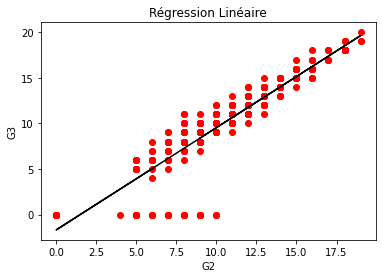

In [39]:
plt.scatter(x,y,color="r")
plt.title("Régression Linéaire")
plt.xlabel("G2")
plt.ylabel("G3")
plt.plot(x,model.predict(x),color="k")
plt.show()


# 


# 7. Experiment


In [81]:
# Créons une fonction nommée NoteFinale pour expérimenter notre modèle.
def NoteFinale(model, G2=12):
    X=np.array([G2]).reshape(1,1)
    print(model.predict(X))

In [82]:
NoteFinale(model)

[11.77358196]
